# <center><u><h1 style="color:red;">Lending Club Loan Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('lending loan.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## creating the Metadata.csv file containing description of all the columns


In [4]:
var = list(df.columns)
var.sort()
desc = ['The number of accounts on which the borrower is now delinquent.',
        'Number of trades opened in past 24 months.',
        'The state provided by the borrower in the loan application',
        'Balance to credit limit on all trades',
        'The self-reported annual income provided by the borrower during registration',
        'The combined self-reported annual income provided by the co-borrowers during registration',
        'Indicates whether the loan is an individual application or a joint application with two co-borrowers',
        'Average current balance of all accounts',
        'Total open to buy on revolving bankcards',
        'Ratio of total current balance to high credit/credit limit for all bankcard accounts',
        'Number of charge-offs within 12 months',
        'The collection fee incurred in loan recovery',
        'Number of collections in 12 months excluding medical collections',
        'Y if the borrower is working with debt-settlement company',
        'Most recent date when debt settlement flag is set',
        'Argeed-upon time, till which borrower does not have to pay the lender principal or interest on the loan',
        'The number of 30+ days past-due incidences of delinquency in the borrower\'s credit file for the past 2 years',
        'The past-due amount owed for the accounts on which the borrower is now delinquent',
        'Loan description provided by the borrower',
        'Cash or directpay method of disbursement',
        'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income',
        'A ratio calculated using the co-borrowers\' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers\' combined self-reported monthly income',
        'The date the borrower\'s earliest reported credit line was opened',
        'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years',
        'The job title supplied by the Borrower when applying for the loan (compulsory)',
        'The upper boundary range the borrower’s FICO at loan origination belongs to',
        'The lower boundary range the borrower’s FICO at loan origination belongs to',
        'The total amount committed to that loan at that point in time',
        'The total amount committed by investors to that loan at that point in time',
        'LC assigned loan grade', 
        'The interest payment that the borrower has committed to make each month while they are on a hardship plan',
        'Account days past due as of the hardship plan start date',
        'The end date of the hardship plan period',
        'Flags whether or not the borrower is on a hardship plan',
        'The last payment amount as of the hardship plan start date',
        'The number of months the borrower will make smaller payments than normally obligated due to a hardship plan',
        'Loan Status as of the hardship plan start date',
        'The payoff balance amount as of the hardship plan start date',
        'Describes the reason the hardship plan was offered',
        'The start date of the hardship plan period',
        'Describes if the hardship plan is active, pending, canceled, completed, or broken',
        'Describes the hardship plan offering',
        'The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER',
        'A unique LC assigned ID for the loan listing',
        'Ratio of total current balance to high credit/credit limit on all install acct',
        'The initial listing status of the loan. Possible values are – W, F',
        'Number of personal finance inquiries',
        'Number of credit inquiries in past 12 months',
        'The number of inquiries in past 6 months (excluding auto and mortgage inquiries)',
        'The monthly payment owed by the borrower if the loan originates',
        'Interest Rate on the loan',
        'Loan issue date',
        'Date when last credit inquiry was made',
        'The upper boundary range the borrower’s last FICO pulled belongs to',
        'The lower boundary range the borrower’s last FICO pulled belongs to',
        'Last total payment amount received',
        'Last month payment was received',
        'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.',
        'Current status of the loan',
        'Maximum current balance owed on all revolving accounts',
        'A unique LC assigned Id for the borrower member',
        'Months since oldest bank installment account opened', 
        'Months since oldest revolving account opened',
        'Months since most recent revolving account opened',
        'Months since most recent account opened',
        'Number of mortgage accounts',
        'The number of months since the borrower’s last delinquency',
        'Months since most recent 90-day or worse rating',
        'The number of months since the last public record',
        'Months since most recent installment accounts opened',
        'Months since most recent bankcard account opened',
        'Months since most recent bankcard delinquency',
        'Months since most recent inquiry',
        'Months since most recent revolving delinquency',
        'Next scheduled payment date',
        'Number of accounts ever 120 or more days past due',
        'Number of currently active bankcard accounts',
        'Number of currently active revolving trades',
        'Number of satisfactory bankcard accounts',
        'Number of bankcard accounts',
        'Number of installment accounts',
        'Number of open revolving accounts',
        'Number of revolving accounts',
        'Number of revolving trades with balance >0',
        'Number of satisfactory accounts',
        'Number of accounts currently 120 days past due (updated in past 2 months)',
        'Number of accounts currently 30 days past due (updated in past 2 months)',
        'Number of accounts 90 or more days past due in last 24 months',
        'Number of accounts opened in past 12 months',
        'The number of open credit lines in the borrower’s credit file',
        'Number of open trades in last 6 months',
        'Number of currently active installment trades',
        'Number of installment accounts opened in past 12 months',
        'Number of installment accounts opened in past 24 months',
        'Number of revolving trades opened in past 12 months',
        'Number of revolving trades opened in past 24 months',
        'The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date',
        'Remaining outstanding principal for total amount funded',
        'Remaining outstanding principal for portion of total amount funded by investors',
        'The day the first hardship plan payment is due',
        'Percent of trades never delinquent',
        'Percentage of all bankcard accounts > 75% of limit.',
        'publicly available policy_code=1',
        'Number of derogatory public records',
        'Number of public record bankruptcies',
        'A category provided by the borrower for the loan request.',
        'Indicates if a payment plan has been put in place for the loan',
        'post charge off gross recovery',
        'Total credit revolving balance',
        'Sum of revolving credit balance of the co-borrowers, net of duplicate balances',
        'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit',
        'Number of charge-offs within last 12 months at time of application for the secondary applicant',
        'Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant',
        'Earliest credit line at time of application for the secondary applicant',
        'FICO range (high) for the secondary applicant',
        'FICO range (low) for the secondary applicant',
        'Credit inquiries in the last 6 months at time of application for the secondary applicant',
        'Number of mortgage accounts at time of application for the secondary applicant',
        'Months since most recent 90-day or worse rating at time of application for the secondary applicant',
        'Number of revolving accounts at time of application for the secondary applicant',
        'Number of open trades at time of application for the secondary applicant',
        'Number of currently active installment trades at time of application for the secondary applicant',
        'Ratio of total current balance to high credit/credit limit for all revolving accounts',
        'The loan amount that the borrower has agreed to settle for',
        'The date that the borrower agrees to the settlement plan',
        'The settlement amount as a percentage of the payoff balance amount on the loan',
        'The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN',
        'The number of months that the borrower will be on the settlement plan',
        'LC assigned loan subgrade',
        'Number of tax liens',
        'The number of payments on the loan. Values are in months and can be either 36 or 60',
        'The loan title provided by the borrower',
        'Total collection amounts ever owed',
        'Total current balance of all accounts',
        'Total high credit/credit limit',
        'The total number of credit lines currently in the borrower’s credit file',
        'Total credit balance excluding mortgage',
        'Total current balance of all installment accounts',
        'Total bankcard high credit/credit limit',
        'Number of finance trades',
        'Total installment high credit/credit limit',
        'Payments received to date for total amount funded',
        'Payments received to date for portion of total amount funded by investors',
        'Interest received to date',
        'Late fees received to date',
        'Principal received to date',
        'Total revolving high credit/credit limit',
        'URL for the LC page with listing data',
        'Indicates if income was verified by LC, not verified, or if the income source was verified',
        'Indicates if the co-borrowers’ joint income was verified by LC, not verified, or if the income source was verified',
        'The first 3 numbers of the zip code provided by the borrower in the loan application',
       ]
data = {'Variables' : var,
        'Description' : desc}
md = pd.DataFrame(data)
md.to_csv('MetaData.csv')
md

,Variables,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
146,total_rev_hi_lim,Total revolving high credit/credit limit
147,url,URL for the LC page with listing data
148,verification_status,"Indicates if income was verified by LC, not ve..."
149,verification_status_joint,Indicates if the co-borrowers’ joint income wa...


### Describing data

In [5]:
#observing properties of df
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Considering loan_status

In [6]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [7]:
#considering loan status' columns that show whether it is paid or not
df=df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

<AxesSubplot:xlabel='loan_status', ylabel='count'>

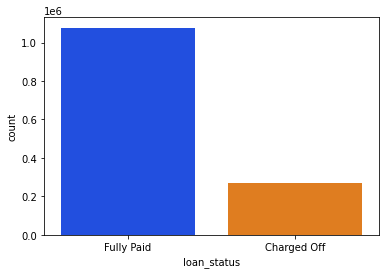

In [8]:
#seeing the relative frequency using graph plotting
sns.set_palette("bright")
sns.countplot(x=df.loan_status,data=df)

## Handling Null Values

In [9]:
#dropping columns 

# 0 -> removing columns with high count of NULL values
drop0=df.columns[df.isnull().mean()>0.9]
df=df.drop(drop0,axis=1)
df.shape

(1345310, 112)

In [10]:
# 1 -> remove columns with only one unique value except nan among all rows
unique_cols=df.apply(pd.Series.nunique)
drop1=unique_cols[unique_cols == 1].index.tolist()
print(drop1)
df=df.drop(drop1,axis=1)

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']


In [11]:
# 2 -> remove columns in which all values are distinct
drop2=unique_cols[unique_cols==len(df)].index.tolist()
print(drop2)
df=df.drop(drop2,axis=1)

['id', 'url']


In [12]:
# 3 -> removing the columns filled with more than 50% nan values
nanfil = []
for i in df.columns:
    if df[i].isnull().sum()/len(df) > 0.5:
        nanfil.append(i)

df = df.drop(nanfil, axis = 1)
df.shape

(1345310, 86)

### Handling Messed up data

In [13]:
#dealing with emp_length by converting it from string to int
df['emp_length'].describe()

count       1266799
unique           11
top       10+ years
freq         442199
Name: emp_length, dtype: object

In [14]:
emp_length_to_int={'< 1 year':0.5,
                      '1 year':1,
                     '2 years':2,
                     '3 years':3,
                     '4 years':4,
                     '5 years':5,
                     '6 years':6,
                     '7 years':7,
                     '8 years':8,
                     '9 years':9,
                     '10+ years':10}
df['emp_length'] = df['emp_length'].map(emp_length_to_int)
mode_emp=df['emp_length'].mode()[0]
mode_emp

10.0

In [15]:
df['emp_length'].fillna(mode_emp,inplace= True)

In [16]:
n=df.select_dtypes(include='O').columns
n

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

## Grade Count Plot
A higher LC assigned loan grade implies the more likely a borrower would repay the loan. The acceptance rate is more distributed to candidates with a grade of A, B and C.

<AxesSubplot:xlabel='count', ylabel='grade'>

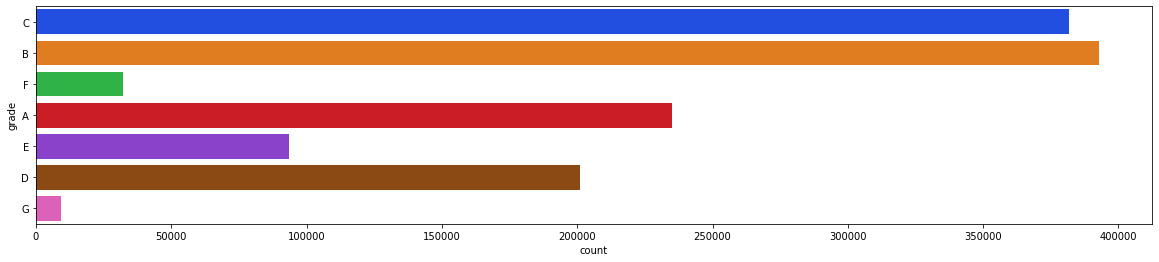

In [17]:
fig = plt.figure(figsize=(20, 4))
sns.countplot(y="grade", data=df)

## Loan Status vs Other Attributes
The below plots have 4 subplots where each certain significance

* Plot 1: Terms vs Loan Status - Relation between how terms affected the loan status.
* Plot 2: Home Onwership vs Loan Status - No significant differnece between this comparision
* Plot 3: Verification Status vs Loan Status
* Plot 4: Debt vs Loan Status - Loan charged off significantly for debt consolidation

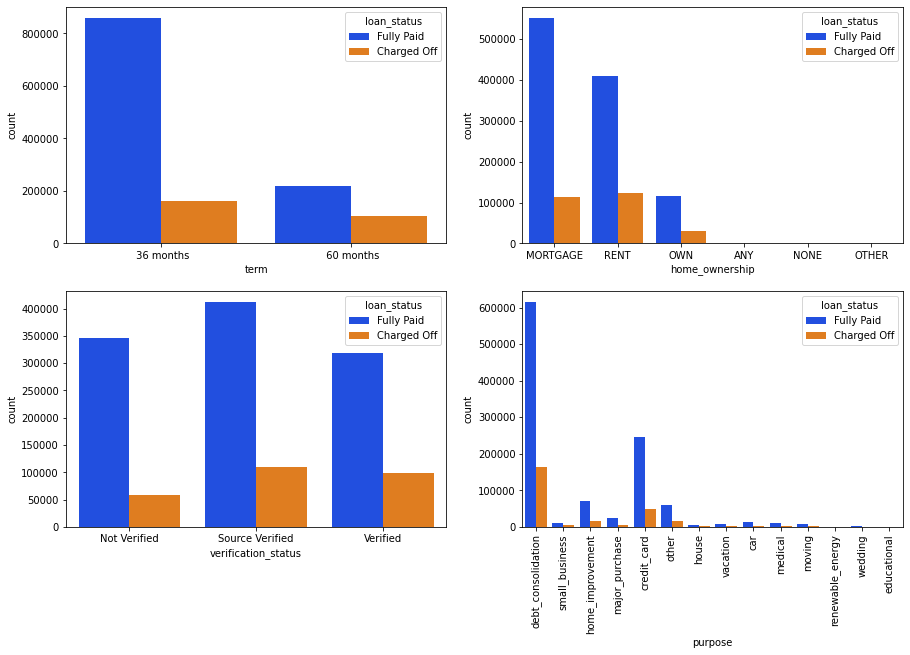

In [18]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Grade vs Loan Status
Key Observations:

* As grade goes higher the count of charged off increases. There is a higher risk in allocating loan to candidates with a higher grade.
* Grade C onwards has higher loan fully paid to charged off ratio.
* Looking at the sub grade, it follows a normal distribution of loan fully paid to charged off ratio.

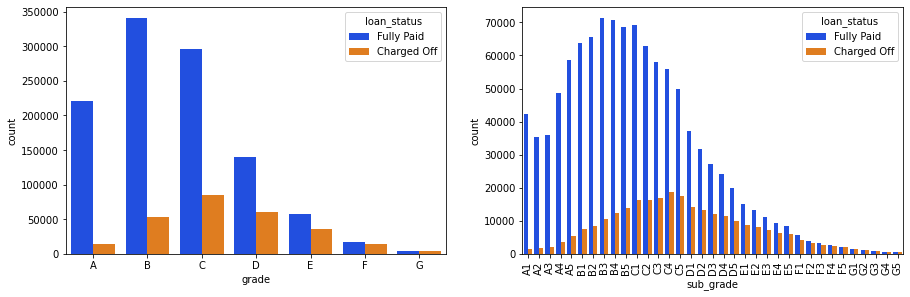

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

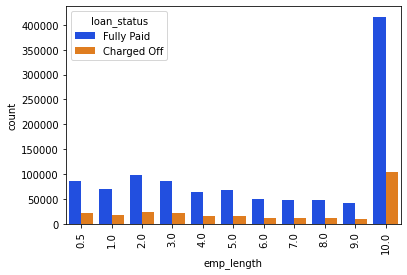

In [20]:
g = sns.countplot(x='emp_length', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Employee Title vs Loans Accepted
Maximum number of loans are accepted for professions with a more stable jobs (according to the society) like Teacher, Nurse, Owner and etc.

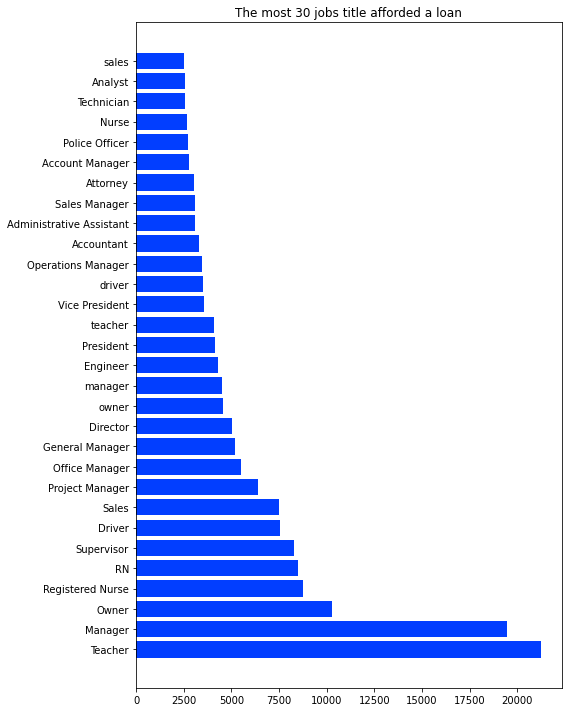

In [22]:
plt.figure(figsize=(8, 10))
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

## Application Type vs Loan Status
This plot focuses more on loan status in accordance with the application type

<AxesSubplot:xlabel='application_type', ylabel='count'>

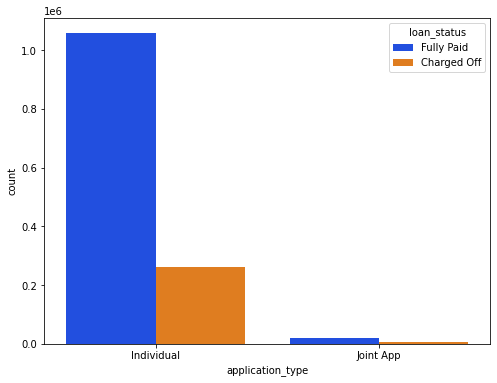

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x="application_type", data=df, hue="loan_status")

<AxesSubplot:xlabel='purpose', ylabel='count'>

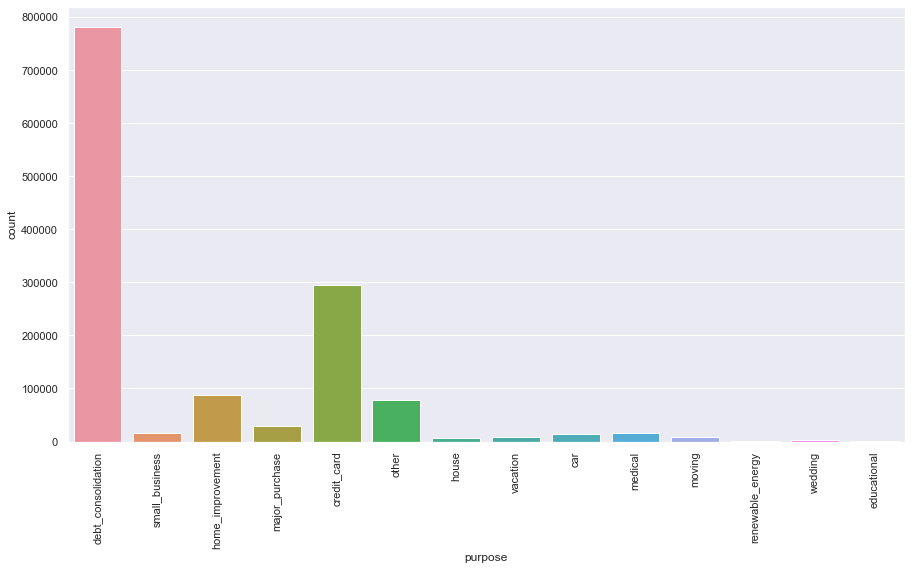

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(rotation=90)
sns.countplot(df['purpose'])

## Creating 0-1 category for continous variables

In [25]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [26]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [27]:
md[md['Variables']=='pub_rec_bankruptcies']['Description']

104    Number of public record bankruptcies
Name: Description, dtype: object

## Loan Status vs Public Related Attributes
The below plots have 4 subplots where each certain significance

* Plot 1: pub_rec vs Loan Status - Number of derogatory public records affecting the loan status.
* Plot 2: initial_list_status vs Loan Status - status vs loan_status
* Plot 3: Application type vs Loan Status
* Plot 4: mortgage account vs Loan Status
* Plot 5: public record bankruptcies affecting loan status

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

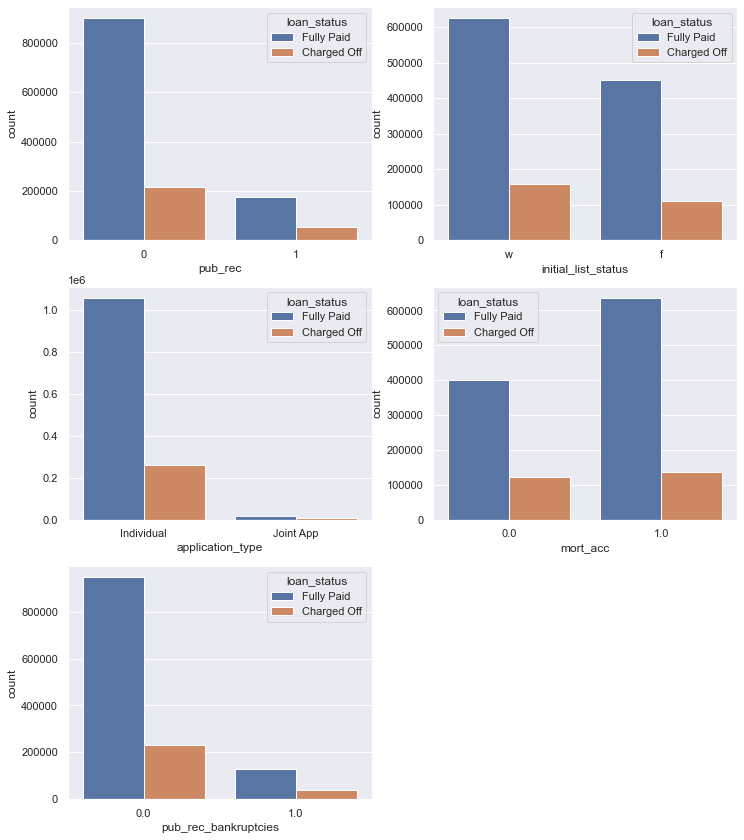

In [28]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 86 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1345310 non-null  float64
 1   funded_amnt                 1345310 non-null  float64
 2   funded_amnt_inv             1345310 non-null  float64
 3   term                        1345310 non-null  object 
 4   int_rate                    1345310 non-null  float64
 5   installment                 1345310 non-null  float64
 6   grade                       1345310 non-null  object 
 7   sub_grade                   1345310 non-null  object 
 8   emp_title                   1259525 non-null  object 
 9   emp_length                  1345310 non-null  float64
 10  home_ownership              1345310 non-null  object 
 11  annual_inc                  1345310 non-null  float64
 12  verification_status         1345310 non-null  object 
 1

## Cleaning remaining small amount of messed data

In [30]:
df.isnull().sum()/len(df)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
                                ...   
total_bal_ex_mort             3.514506
total_bc_limit                3.514506
total_il_high_credit_limit    5.019438
disbursement_method           0.000000
debt_settlement_flag          0.000000
Length: 86, dtype: float64

In [31]:
df=df.dropna().reset_index(drop = True)

In [32]:
df.shape

(986399, 86)

In [33]:
df.isnull().any().sum()

0

In [34]:
categorical = [feature for feature in df.columns if df[feature].dtype == "O"]

In [35]:
categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

In [36]:
for value in categorical:
    print(value)
    print(df[value].nunique())

term
2
grade
7
sub_grade
35
emp_title
291510
home_ownership
6
verification_status
3
issue_d
77
loan_status
2
purpose
14
title
31900
zip_code
938
addr_state
51
earliest_cr_line
717
initial_list_status
2
last_pymnt_d
79
last_credit_pull_d
81
application_type
2
disbursement_method
2
debt_settlement_flag
2


In [37]:
df.drop(['sub_grade', 'emp_title','title', 'zip_code'], axis = 1, inplace = True)

In [38]:
categorical = [feature for feature in df.columns if df[feature].dtype == "O"]
categorical

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

In [39]:
for value in categorical:
    print(value)
    print(df[value].nunique())

term
2
grade
7
home_ownership
6
verification_status
3
issue_d
77
loan_status
2
purpose
14
addr_state
51
earliest_cr_line
717
initial_list_status
2
last_pymnt_d
79
last_credit_pull_d
81
application_type
2
disbursement_method
2
debt_settlement_flag
2


## Feature Engineering for Dates

In [40]:
df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Dec-2015,Aug-2003,Jan-2019,Mar-2019
1,Dec-2015,Dec-1999,Jun-2016,Mar-2019
2,Dec-2015,Jun-1998,Jul-2016,Mar-2018
3,Dec-2015,Jun-1990,Nov-2016,Mar-2019
4,Dec-2015,Feb-1999,Jan-2017,Mar-2019
...,...,...,...,...
986394,Oct-2016,Aug-1992,Oct-2018,Nov-2018
986395,Oct-2016,Mar-2002,Jul-2018,Jul-2018
986396,Oct-2016,Jun-2011,Mar-2017,Dec-2018
986397,Oct-2016,Aug-1997,Mar-2018,Mar-2019


In [41]:
date_col = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [42]:
for value in date_col:
    df[value + '_month'] = df[value].apply(lambda x : x[0:3])
    df[value + '_year'] = df[value].apply(lambda x : x[-4: ])

In [43]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10.0,MORTGAGE,55000.0,...,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10.0,MORTGAGE,65000.0,...,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3.0,MORTGAGE,104433.0,...,Cash,N,Dec,2015,Jun,1998,Jul,2016,Mar,2018
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10.0,MORTGAGE,180000.0,...,Cash,N,Dec,2015,Jun,1990,Nov,2016,Mar,2019
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10.0,MORTGAGE,85000.0,...,Cash,N,Dec,2015,Feb,1999,Jan,2017,Mar,2019


In [44]:
df.drop(date_col, axis = 1, inplace = True)

In [45]:
month_order = df['issue_d_month'].unique()

In [46]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [47]:
for column in date_col:
    df[column + '_month'] = df[column + '_month'].apply(lambda x : month_order.index(x))

In [48]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10.0,MORTGAGE,55000.0,...,Cash,N,11,2015,7,2003,0,2019,2,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10.0,MORTGAGE,65000.0,...,Cash,N,11,2015,11,1999,5,2016,2,2019
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3.0,MORTGAGE,104433.0,...,Cash,N,11,2015,5,1998,6,2016,2,2018
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10.0,MORTGAGE,180000.0,...,Cash,N,11,2015,5,1990,10,2016,2,2019
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10.0,MORTGAGE,85000.0,...,Cash,N,11,2015,1,1999,0,2017,2,2019


In [49]:
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
        
    except:
        pass

In [50]:
c = [feature for feature in df.columns if df[feature].dtype == "O"]
c

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

## Encoding Categorical Columns

In [51]:
from sklearn.preprocessing import LabelEncoder
for value in df.columns:
    lbl = LabelEncoder()
    df[value] = lbl.fit_transform(df[[value]])

## Reducing dimensionality of x variables

In [52]:
high_corr=df.corr()
high_corr[high_corr['loan_status']>0.5]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
loan_status,-0.071101,-0.071101,-0.071433,-0.183379,-0.260754,-0.058526,-0.265373,0.017563,-0.075911,0.066323,...,0.002093,-0.323964,0.001152,-0.029474,0.000529,-0.050277,-0.033073,0.110898,-0.108693,0.164011
total_rec_prncp,0.465619,0.465619,0.469820,0.053957,-0.182888,0.489080,-0.180667,0.063038,-0.148102,0.287358,...,-0.004389,-0.137958,-0.017545,-0.115103,-0.006234,-0.142235,-0.014882,0.094451,-0.072543,0.111674
last_fico_range_high,0.049923,0.049922,0.050070,-0.098111,-0.354386,0.038714,-0.351013,0.022911,-0.115737,0.119486,...,0.010737,-0.174369,-0.002004,0.014529,-0.002223,-0.109258,-0.023207,0.093750,-0.088440,0.103091
last_fico_range_low,0.049923,0.049923,0.050070,-0.098114,-0.354392,0.038715,-0.351020,0.022912,-0.115739,0.119490,...,0.010736,-0.174373,-0.002004,0.014523,-0.002224,-0.109261,-0.023209,0.093748,-0.088439,0.103079


In [53]:
high_corr[high_corr['loan_status']<-0.5]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
recoveries,0.188562,0.188562,0.188838,0.213307,0.225416,0.171262,0.234290,0.004738,0.017772,0.036815,...,-0.007042,0.347550,-0.000175,-0.008179,-0.000230,0.007295,0.004352,-0.131002,0.181620,-0.198483
collection_recovery_fee,0.173910,0.173910,0.174177,0.201464,0.215658,0.157322,0.227089,0.003270,0.021757,0.030813,...,-0.006177,0.364633,-0.002595,0.013817,0.000429,0.011859,0.003764,-0.100589,0.170014,-0.181624


In [54]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,104,104,111,0,144,5573,2,10,1,16483,...,0,0,11,3,7,59,0,7,2,7
1,948,948,983,0,107,60096,2,10,1,21901,...,0,0,11,3,11,55,5,4,2,7
2,376,376,402,1,263,18642,5,3,1,37044,...,0,0,11,3,5,54,6,4,2,6
3,760,760,795,0,60,47960,1,10,1,43765,...,0,0,11,3,5,46,10,4,2,7
4,760,760,795,0,52,47481,1,10,1,30811,...,0,0,11,3,1,55,0,5,2,7


loan_status
1    790917
0    195482
dtype: int64

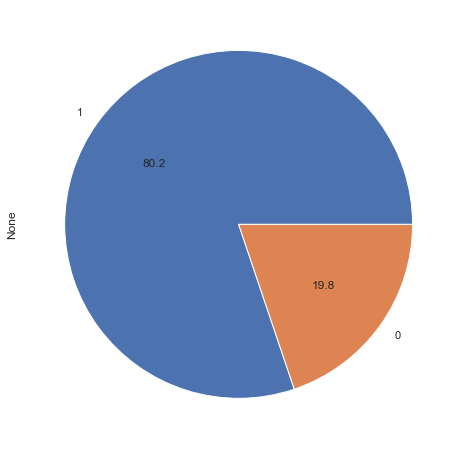

In [55]:
df.value_counts("loan_status").plot.pie(autopct = "%.1f")
df.value_counts("loan_status")

In [56]:
# notdone = df[df["loan_status"] == 0]
# done = df[df["loan_status"] == 1]

# # Resampling the original dataset with 1,95,482 datapoints for both classes
# notdone_resample = notdone.sample(n = 195482, random_state = 777)
# done_resample = done.sample(n = 195482, random_state = 777)
# df_eda=df.copy()
# # Creating new dataset consisting of equal class occurence 
# df = pd.concat([notdone_resample, done_resample], axis = 0)

In [57]:
# df['grade'].value_counts()

In [58]:
y = df['loan_status']
X = df[['total_rec_prncp','last_fico_range_high','last_fico_range_low','recoveries','collection_recovery_fee']]

## Balancing the target categories

In [59]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_smote, y_smote = rus.fit_resample(X, y)

## Scaling Independent Variables

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
# scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=.2, random_state=777, shuffle=True)

## Applying Algorithms to predict the target variable

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
gb=GradientBoostingClassifier()
reg=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
b=BernoulliNB()
xg=XGBClassifier()
ad=AdaBoostClassifier()

In [62]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score,accuracy_score
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print('Train Data')
    print(classification_report(y_train,y_pred_train))
    print('-'*30)
    print('Test Data')
    print(classification_report(y_test,y_pred_test))
    print('-'*30)
    print('Roc_auc score')
    print(roc_auc_score(y_test, y_pred_test))
    print('-'*30)
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred_test))
    return model

In [63]:
for i in [reg,knn,dt,rf,b,ad,xg,gb]:
    print('when my model is:',i)
    my_model(i)
    print('*'*90)

when my model is: LogisticRegression()
Train Data
              precision    recall  f1-score   support

           0       0.97      0.78      0.87    158003
           1       0.82      0.98      0.89    158363

    accuracy                           0.88    316366
   macro avg       0.90      0.88      0.88    316366
weighted avg       0.90      0.88      0.88    316366

------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.97      0.78      0.87    632914
           1       0.82      0.98      0.89    632554

    accuracy                           0.88   1265468
   macro avg       0.90      0.88      0.88   1265468
weighted avg       0.90      0.88      0.88   1265468

------------------------------
Roc_auc score
0.8800027127276848
------------------------------
Confusion matrix
[[494953 137961]
 [ 13927 618627]]
******************************************************************************************
when my model is:

[[611724  21190]
 [ 24388 608166]]
******************************************************************************************


In [64]:
# pgsvm={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01],'kernel':['rbf','linear']}
# pgrandomforest={
#     'n_estimators':[100,200,300,400,500],
#     'criterion':['gini','entropy'],
#     'max_depth':np.arange(1,21),
#     'min_samples_split':np.arange(5,41,5),
# }
# pgxgboost = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01,0.05,0.1],
#     'booster': ['gbtree', 'gblinear'],
#     'gamma': [0, 0.5, 1],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1, 5],
#     'base_score': [0.2, 0.5, 1]
# }
ad=AdaBoostClassifier(base_estimator=b)
pgadaboost = {'n_estimators': [100,200,300,400,500], 
           'learning_rate': [0.01, 0.03, 0.1, 0.3, 1],
             'algorithm':['SAMME', 'SAMME.R'],
             }

In [65]:
from sklearn.model_selection import RandomizedSearchCV
# randomforest=RandomizedSearchCV(estimator = rf, param_distributions = pgrandomforest,scoring='accuracy',cv = 5, n_jobs = -1)
# # supportvector=RandomizedSearchCV(estimator = svc, param_distributions = pgsvm,scoring='accuracy',cv = 5, n_jobs = -1)
# xgboost=RandomizedSearchCV(estimator = xg, param_distributions = pgxgboost,scoring='accuracy',cv = 5, n_jobs = -1)
adaboost=RandomizedSearchCV(estimator = ad, param_distributions = pgadaboost,scoring='accuracy',cv = 5, n_jobs = -1)

In [66]:
for i in [adaboost]:
    print('when my model is:',i)
    my_model(i)
    print('*'*90)

when my model is: RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=BernoulliNB()),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.03, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')
Train Data
              precision    recall  f1-score   support

           0       0.99      0.72      0.84    158003
           1       0.78      1.00      0.88    158363

    accuracy                           0.86    316366
   macro avg       0.89      0.86      0.86    316366
weighted avg       0.89      0.86      0.86    316366

------------------------------
Test Data
              precision    recall  f1-score   support

           0     

In [69]:
a={
    'model':['Logistic Regression','KNeighbors Classifier','DecisionTree Classifier','RandomForest Classifier','BernoulliNB','AdaBoost Classifier','XGBoost Classifier','GradientBoosting Classifier','Hyper-Parameter Tuned AdaBoost'],
   'object':['reg','knn','dt','rf','b','ad','xg','gb','adaboost'],
   'training accuracy score':[0.88,0.99,1.0,1.0,0.86,0.96,0.99,0.96,0.86],
   'testing accuracy score':[0.88,0.99,0.98,0.97,0.86,0.96,0.98,0.96,0.86]
  }

In [70]:
scores=pd.DataFrame(a)

In [73]:
scores.to_excel('scores.xlsx')

In [74]:
scores

,model,object,training accuracy score,testing accuracy score
0,Logistic Regression,reg,0.88,0.88
1,KNeighbors Classifier,knn,0.99,0.99
2,DecisionTree Classifier,dt,1.00,0.98
3,RandomForest Classifier,rf,1.00,0.97
4,BernoulliNB,b,0.86,0.86
5,AdaBoost Classifier,ad,0.96,0.96
6,XGBoost Classifier,xg,0.99,0.98
7,GradientBoosting Classifier,gb,0.96,0.96
8,Hyper-Parameter Tuned AdaBoost,adaboost,0.86,0.86
